# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [102]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option("display.max_rows", 10)

# izberemo interaktivni "notebook" stil risanja #požen od začetka vedno ko delaš da ti ne nabija številko vrstice, notebook je na inter
%matplotlib inline 
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv') #tu bi lahk os.path.join

Poglejmo si podatke.

In [103]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [104]:
filmi = filmi.sort_values("ocena") #vrne nov dataframe, ne modificira starega, v splošnem nemorš vedet a je modifiing metoda al sam vrne

Poberite stolpec ocen.

In [117]:
%%time
ocene_filmov = filmi[['ocena']] #dvojni oklepaji so dataframe, enojni so series, drugač [["ocena", "neki"]]
ocene_filmov 


CPU times: user 1.4 ms, sys: 43 µs, total: 1.44 ms
Wall time: 1.44 ms


,ocena
9739,1.0
9825,1.1
8983,1.4
9505,1.4
9513,1.4
...,...
4059,9.0
9355,9.1
908,9.2
4058,9.3


Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [106]:
print(type(filmi['ocena'])) #series so malbol pametn seznam, lahk das list(series) nepriporočljivo
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [107]:
zaokrožene_ocene = round(ocene_filmov)
zaokrožene_ocene

,ocena
9739,1.0
9825,1.0
8983,1.0
9505,1.0
9513,1.0
...,...
4059,9.0
9355,9.0
908,9.0
4058,9.0


Dodajte zaokrožene vrednosti v podatke.

In [108]:
filmi["zaokrožene ocene"] = zaokrožene_ocene #tu daš pol enojne te kvadratne zaklepaje, dataframe je slovar stolpcev, tu spet neveš če modificira originalno al vrne, če vrne none tastaro spremeni, če vrne tipično ne spreminja stare
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrožene ocene
9739,7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37659,NaN,NaN,Cumali Ceber goes to a vacation with his child...,1.0
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv...",1.0
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...,1.0
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...,1.0
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4059,252488,Hababam Sinifi Sinifta Kaldi,91,1976,9.0,NaN,21288,NaN,NaN,A young and beautiful female teacher starts wo...,9.0
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...,9.0
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...,9.0
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b...",9.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [109]:
filmi = filmi.drop(columns="zaokrožene ocene")
filmi
#lahk bi tud del filmi["ocena"]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9739,7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37659,NaN,NaN,Cumali Ceber goes to a vacation with his child...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
...,...,...,...,...,...,...,...,...,...,...
4059,252488,Hababam Sinifi Sinifta Kaldi,91,1976,9.0,NaN,21288,NaN,NaN,A young and beautiful female teacher starts wo...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [110]:
podtabela = filmi[["naslov", "leto", "glasovi"]].copy() #tu mors dat dvojne ker hoces podtabelo
podtabela["zaokrožene ocene"] = zaokrožene_ocene #če nebi kopiju pa bi tu neki spreminju bi originalno spreminjalo
podtabela

,naslov,leto,glasovi,zaokrožene ocene
9739,Cumali Ceber: Allah Seni Alsin,2017,37659,1.0
9825,Sadak 2,2020,57957,1.0
8983,Saving Christmas,2014,14855,1.0
9505,Reis,2017,72207,1.0
9513,Smolensk,2016,7630,1.0
...,...,...,...,...
4059,Hababam Sinifi Sinifta Kaldi,1976,21288,9.0
9355,Aynabaji,2016,21429,9.0
908,Boter,1972,1582906,9.0
4058,Hababam Sinifi,1975,36468,9.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [111]:
filmi[(filmi.leto < 1930) | (filmi.leto > 2017)] #lahk pa tud filmi["leto"] > 1960


,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."
9768,7431594,Race 3,160,2018,1.9,NaN,32574,1690861.0,NaN,Relationships and loyalties of a criminal fami...
9880,8366590,Baaghi 3,143,2020,2.1,NaN,7835,NaN,NaN,A man embarks on a bloody rampage to save his ...
9742,7255568,Student of the Year 2,146,2019,2.2,NaN,15415,778566.0,Not Rated,A student must face off against bullies and ov...
9885,8402090,Cumali Ceber 2,100,2018,2.6,NaN,8221,NaN,NaN,Cumali Ceber learns about the demolition of th...
...,...,...,...,...,...,...,...,...,...,...
9642,6751668,Parazit,132,2019,8.6,96.0,490989,53367844.0,R,Greed and class discrimination threaten the ne...
9858,8176054,Pariyerum Perumal,154,2018,8.7,NaN,7665,NaN,NaN,A law student from a lower caste begins a frie...
9714,7060344,Ratsasan,170,2018,8.7,NaN,20341,NaN,NaN,A Sub-Inspector sets out in pursuit of a myste...
9892,8503618,Hamilton,160,2020,8.7,90.0,43440,NaN,PG-13,The real life of one of America's foremost fou...


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [112]:
def največ_dve_besedi(niz):
    return len(niz.split(" ")) < 3

logični_naslov = filmi["naslov"].apply(največ_dve_besedi)
logični_ocena = filmi.ocena > 8 #bitmask = logicni
filmi[logični_naslov & logični_ocena] #bitmask = logični_naslov & logični_ocena


,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
128,32976,Rebecca,130,1940,8.1,86.0,120274,4360000.0,NaN,A self-conscious woman juggles adjusting to he...
14,15881,Greed,140,1924,8.1,NaN,8940,161800.0,NaN,The sudden fortune won from a lottery fans suc...
1021,72860,Deewaar,174,1975,8.1,NaN,9936,NaN,NaN,Vijay struggles as a dockworker and eventually...
1017,72684,Barry Lyndon,185,1975,8.1,89.0,146428,NaN,NaN,An Irish rogue wins the heart of a rich widow ...
5456,453729,Iqbal,132,2005,8.1,NaN,15715,NaN,NaN,"Iqbal, the deaf and mute son of a farmer, has ..."
...,...,...,...,...,...,...,...,...,...,...
9815,7738784,Peranbu,147,2018,9.0,NaN,11866,NaN,NaN,"A single father tries to raise his daughter, w..."
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."


### Histogrami

Združite filme po ocenah in jih preštejte.

In [125]:
pogrupirani = filmi.groupby("ocena").count()
pogrupirani


,id,naslov,dolzina,leto,metascore,glasovi,zasluzek,oznaka,opis
ocena,,,,,,,,,
1.0,1,1,1,1,0,1,0,0,1
1.1,1,1,1,1,0,1,0,0,1
1.4,3,3,3,3,1,3,1,1,3
1.5,1,1,1,1,0,1,0,1,1
1.6,3,3,3,3,0,3,0,1,3
...,...,...,...,...,...,...,...,...,...
8.9,7,7,7,7,4,7,4,3,7
9.0,6,6,6,6,2,6,2,1,6
9.1,1,1,1,1,0,1,0,0,1


Naredite stolpični diagram teh podatkov.

<AxesSubplot: xlabel='ocena'>

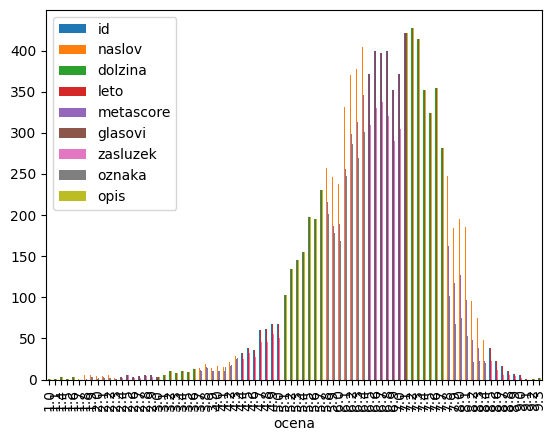

In [118]:
pogrupirani.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<AxesSubplot: title={'center': 'opis'}>

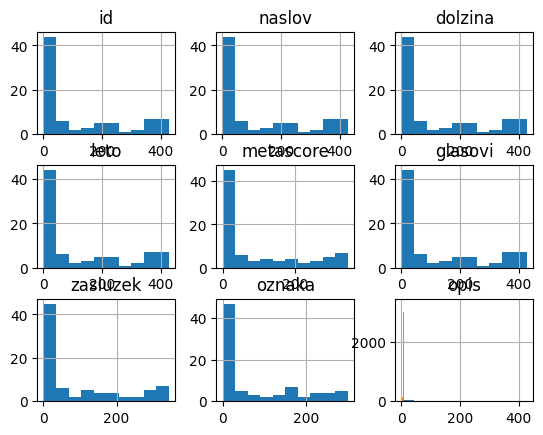

In [126]:
pogrupirani.hist()

### Izris povprečne dolžine filma glede na leto

In [132]:
grupe_let = filmi.groupby("leto")
povprečje = grupe_let.mean() #to da povprečje čez celo razpredelnico

povprečje[["dolzina"]].plot()

,id,dolzina,ocena,metascore,glasovi,zasluzek
leto,,,,,,
1915,4.972000e+03,195.000000,6.300000,NaN,22363.000000,1.000000e+07
1916,6.864000e+03,163.000000,7.700000,99.000000,13970.000000,2.180000e+06
1919,9.968000e+03,90.000000,7.300000,NaN,9296.000000,NaN
1920,1.032300e+04,76.000000,8.100000,NaN,56089.000000,NaN
1921,1.235650e+04,87.500000,8.200000,NaN,60218.000000,5.450000e+06
...,...,...,...,...,...,...
2016,3.588561e+06,109.844444,6.513889,56.147651,73772.366667,4.490194e+07
2017,4.422751e+06,110.602817,6.401127,59.068100,64254.507042,4.678529e+07
2018,5.480176e+06,113.376437,6.458333,57.742647,55233.080460,5.146999e+07


### Izris skupnega zasluzka za posamezno leto

<AxesSubplot: xlabel='leto'>

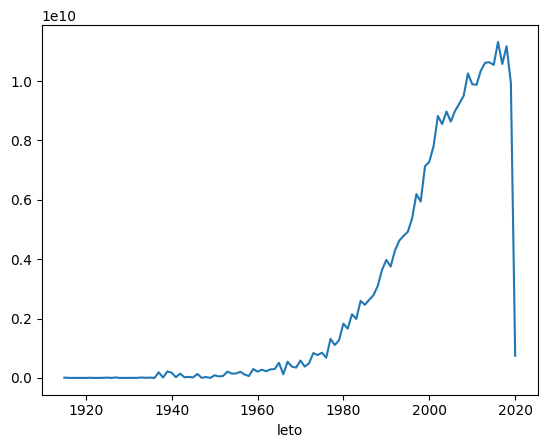

In [133]:
vsote_df = grupe_let.sum()
vsote_df["zasluzek"].plot()
